# EXPLORATORY DATA ANALYSIS

IMPORTING THE LIBRARIES FOR DATA PREPROCESSING

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [61]:
#loading the csv file and giving d1 as file name
d1=pd.read_csv("HR_analytics.csv")
d1.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

#There re 35 columns in which Attrition is the output column

In [62]:
d1.shape

(1470, 35)

#There are 1470 rows and 35 columns in our dataset

In [4]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [63]:
#we can drop the unwanted columns from our dataset that are not much important for our analysis.(employee count is 1,over18 is yes and standard hours is 80 for every entry)
d1.drop('Education',inplace=True,axis=1)
d1.drop('EmployeeCount',inplace=True,axis=1)
d1.drop('Over18',inplace=True,axis=1)
d1.drop('StandardHours',inplace=True,axis=1)

In [64]:
d1.shape

(1470, 31)

In [65]:
#converting object datatype columns into integer using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=["Attrition","BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","OverTime"]
for val in list1:
    d1[val]=le.fit_transform(d1[val].astype(str))

In [66]:
#Checking the datatypes of columns in d1
d1.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
EducationField              int32
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

In [9]:
d1.head()
       

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   EducationField  EmployeeNumber  EnvironmentSatisfaction  Gender  ...  \
0               1               1                        2       0  ...   
1               1               2                        3       1  ...   
2               4               4                        4       1  ...   
3               1               5                        4       0  ...   
4               3               7                        1       1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

In [67]:
d1.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

#There are no null values in our dataset

In [11]:
#To check the number of unique entries in each column
d1.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
EducationField                 6
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

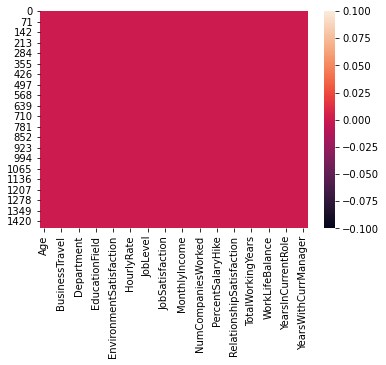

In [12]:
#presence of null values can be checked in visual method using heatmap
sns.heatmap(d1.isnull())

#The non interrupted lines shows absence of null values

In [13]:
d1.describe()

Age    Attrition  BusinessTravel    DailyRate   Department  \
count  1470.000000  1470.000000     1470.000000  1470.000000  1470.000000   
mean     36.923810     0.161224        1.607483   802.485714     1.260544   
std       9.135373     0.367863        0.665455   403.509100     0.527792   
min      18.000000     0.000000        0.000000   102.000000     0.000000   
25%      30.000000     0.000000        1.000000   465.000000     1.000000   
50%      36.000000     0.000000        2.000000   802.000000     1.000000   
75%      43.000000     0.000000        2.000000  1157.000000     2.000000   
max      60.000000     1.000000        2.000000  1499.000000     2.000000   

       DistanceFromHome  EducationField  EmployeeNumber  \
count       1470.000000     1470.000000     1470.000000   
mean           9.192517        2.247619     1024.865306   
std            8.106864        1.331369      602.024335   
min            1.000000        0.000000        1.000000   
25%            2.000000        1.000000      491.250000   
50%            7.000000        2.000000     1020.500000   
75%           14.000000        3.000000     1555.750000   
max           29.000000        5.000000     2068.000000   

       EnvironmentSatisfaction       Gender  ...  PerformanceRating  \
count              1470.000000  1470.000000  ...        1470.000000   
mean                  2.721769     0.600000  ...           3.153741   
std                   1.093082     0.490065  ...           0.360824   
min                   1.000000     0.000000  ...           3.000000   
25%                   2.000000     0.000000  ...           3.000000   
50%                   3.000000     1.000000  ...           3.000000   
75%                   4.000000     1.000000  ...           3.000000   
max                   4.000000     1.000000  ...           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1470.000000       1470.000000        1470.000000   
mean                   2.712245          0.793878          11.279592   
std                    1.081209          0.852077           7.780782   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          1.000000          15.000000   
max                    4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289271         0.706476        6.126525   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 31 columns]

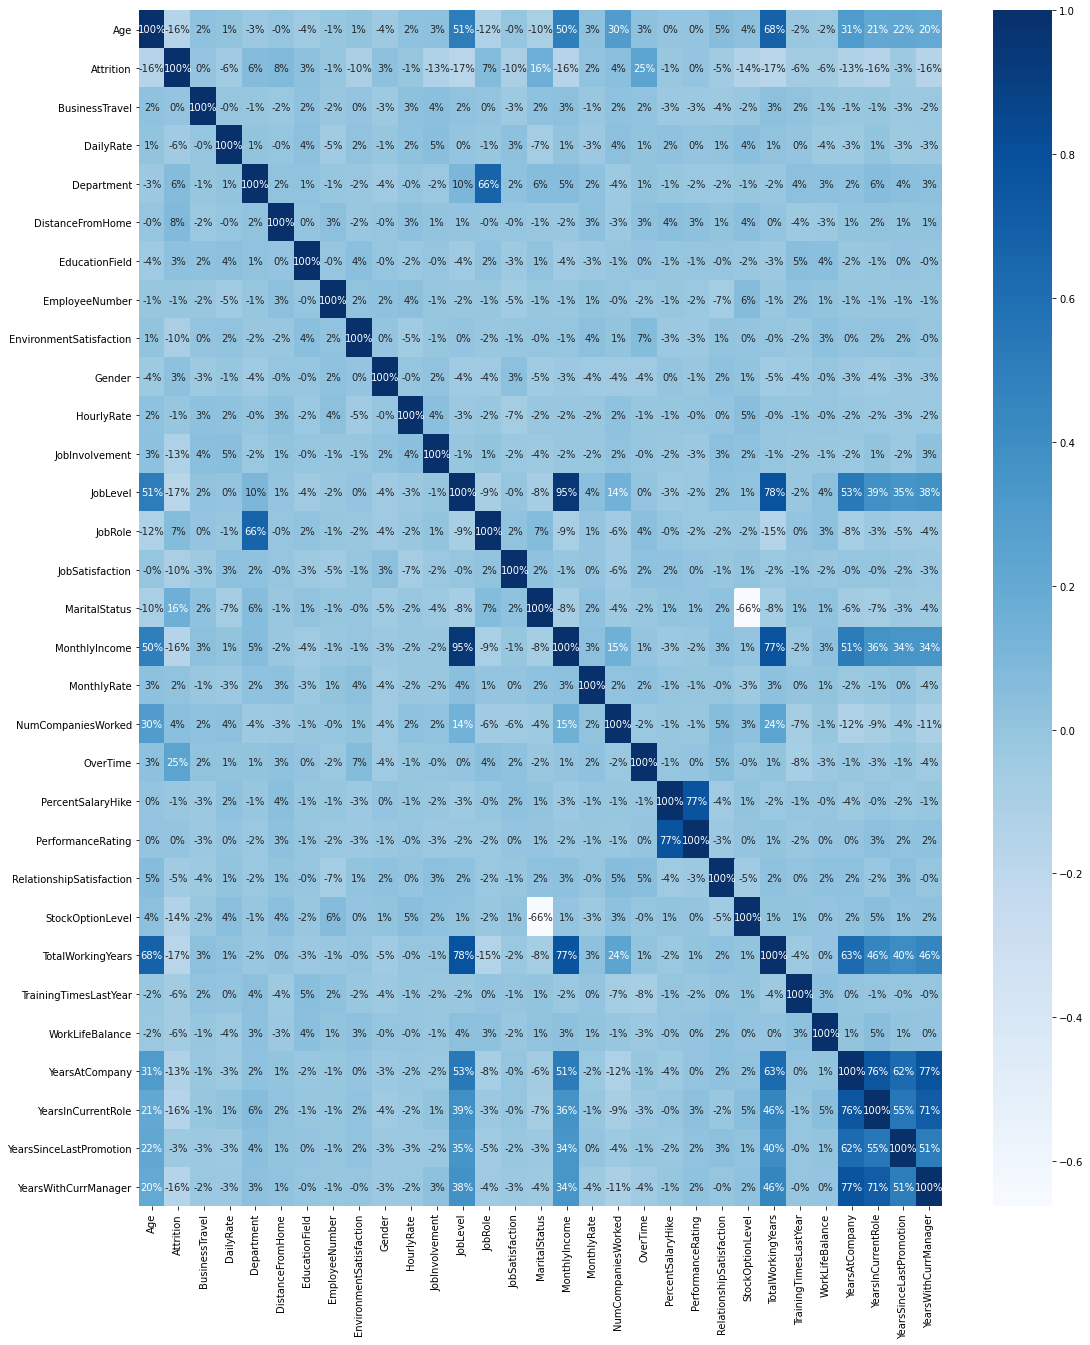

In [14]:
d1cor=d1.corr()
plt.figure(figsize=(18,22))
sns.heatmap(d1cor,cmap='Blues',annot=True,fmt='.0%')
plt.show()

In [15]:
#correlation can be expressed in matrix form also
corr_matrix=d1.corr()
print(corr_matrix["Attrition"].sort_values(ascending=False))

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
M

In [16]:
collist=d1.columns.values
ncol=35
nrows=7

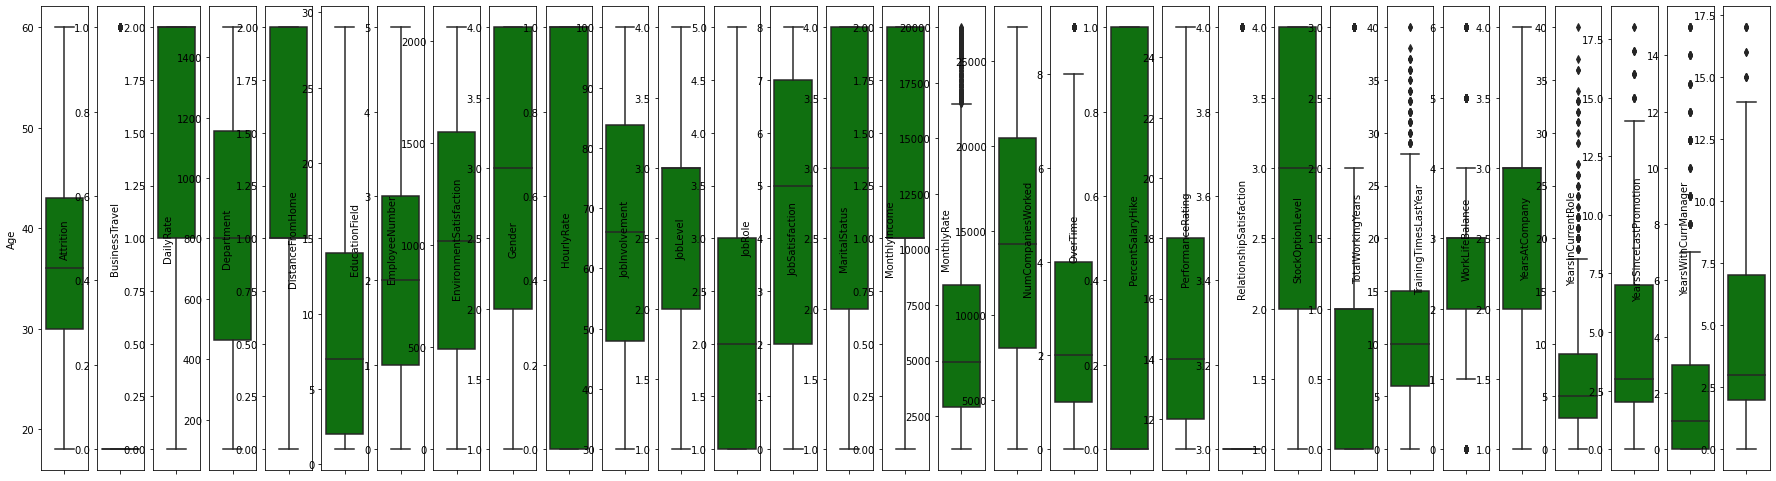

In [17]:
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(d1[collist[i]],color='green',orient='v')

#The black dots in the boxplot represents outliers

# UNIVARIATE ANALYSIS

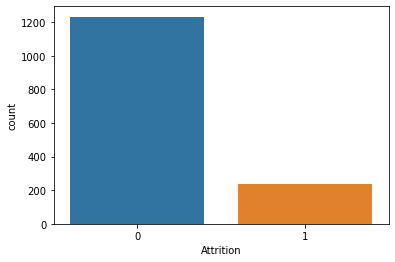

In [18]:
sns.countplot(d1["Attrition"])

#1-attrition occurs ,0- no attrition

#positive attrition count is very less compared to no attrition count

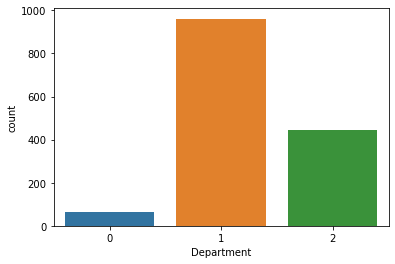

In [19]:
sns.countplot(d1["Department"])

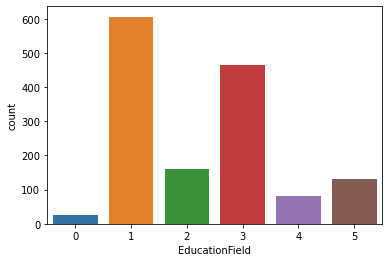

In [20]:
sns.countplot(d1["EducationField"])

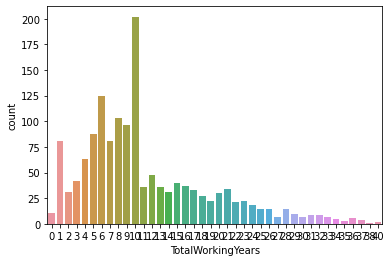

In [21]:
sns.countplot(d1["TotalWorkingYears"])

#Here we can see that major employess work for 10 years
#Most of the employess experiences range from 4 to 10 years
#very low number work for more than 20 years

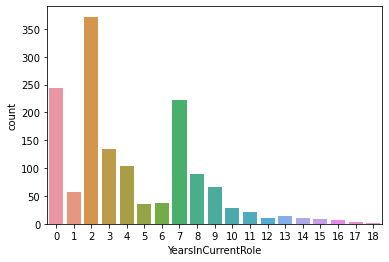

In [22]:
sns.countplot(d1["YearsInCurrentRole"])

#maximum number of employees working for the same job role is for 2 years
#we can see that second maximum employees working for same job is for 0 year and 7 years
#very low number works in same job role for more than 10 years

# BIVARIATE ANALYSIS

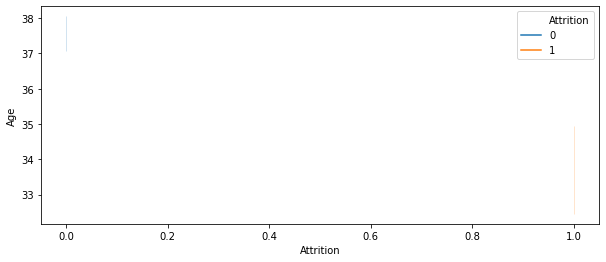

In [23]:
f, ax=plt.subplots(figsize=(10,4))
sns.lineplot(x='Attrition', y='Age',hue='Attrition',data=d1)

#Here we can see that attrition rate is maximum between the age group 20 and 35
#Age above 37 no attrition possibility is seen

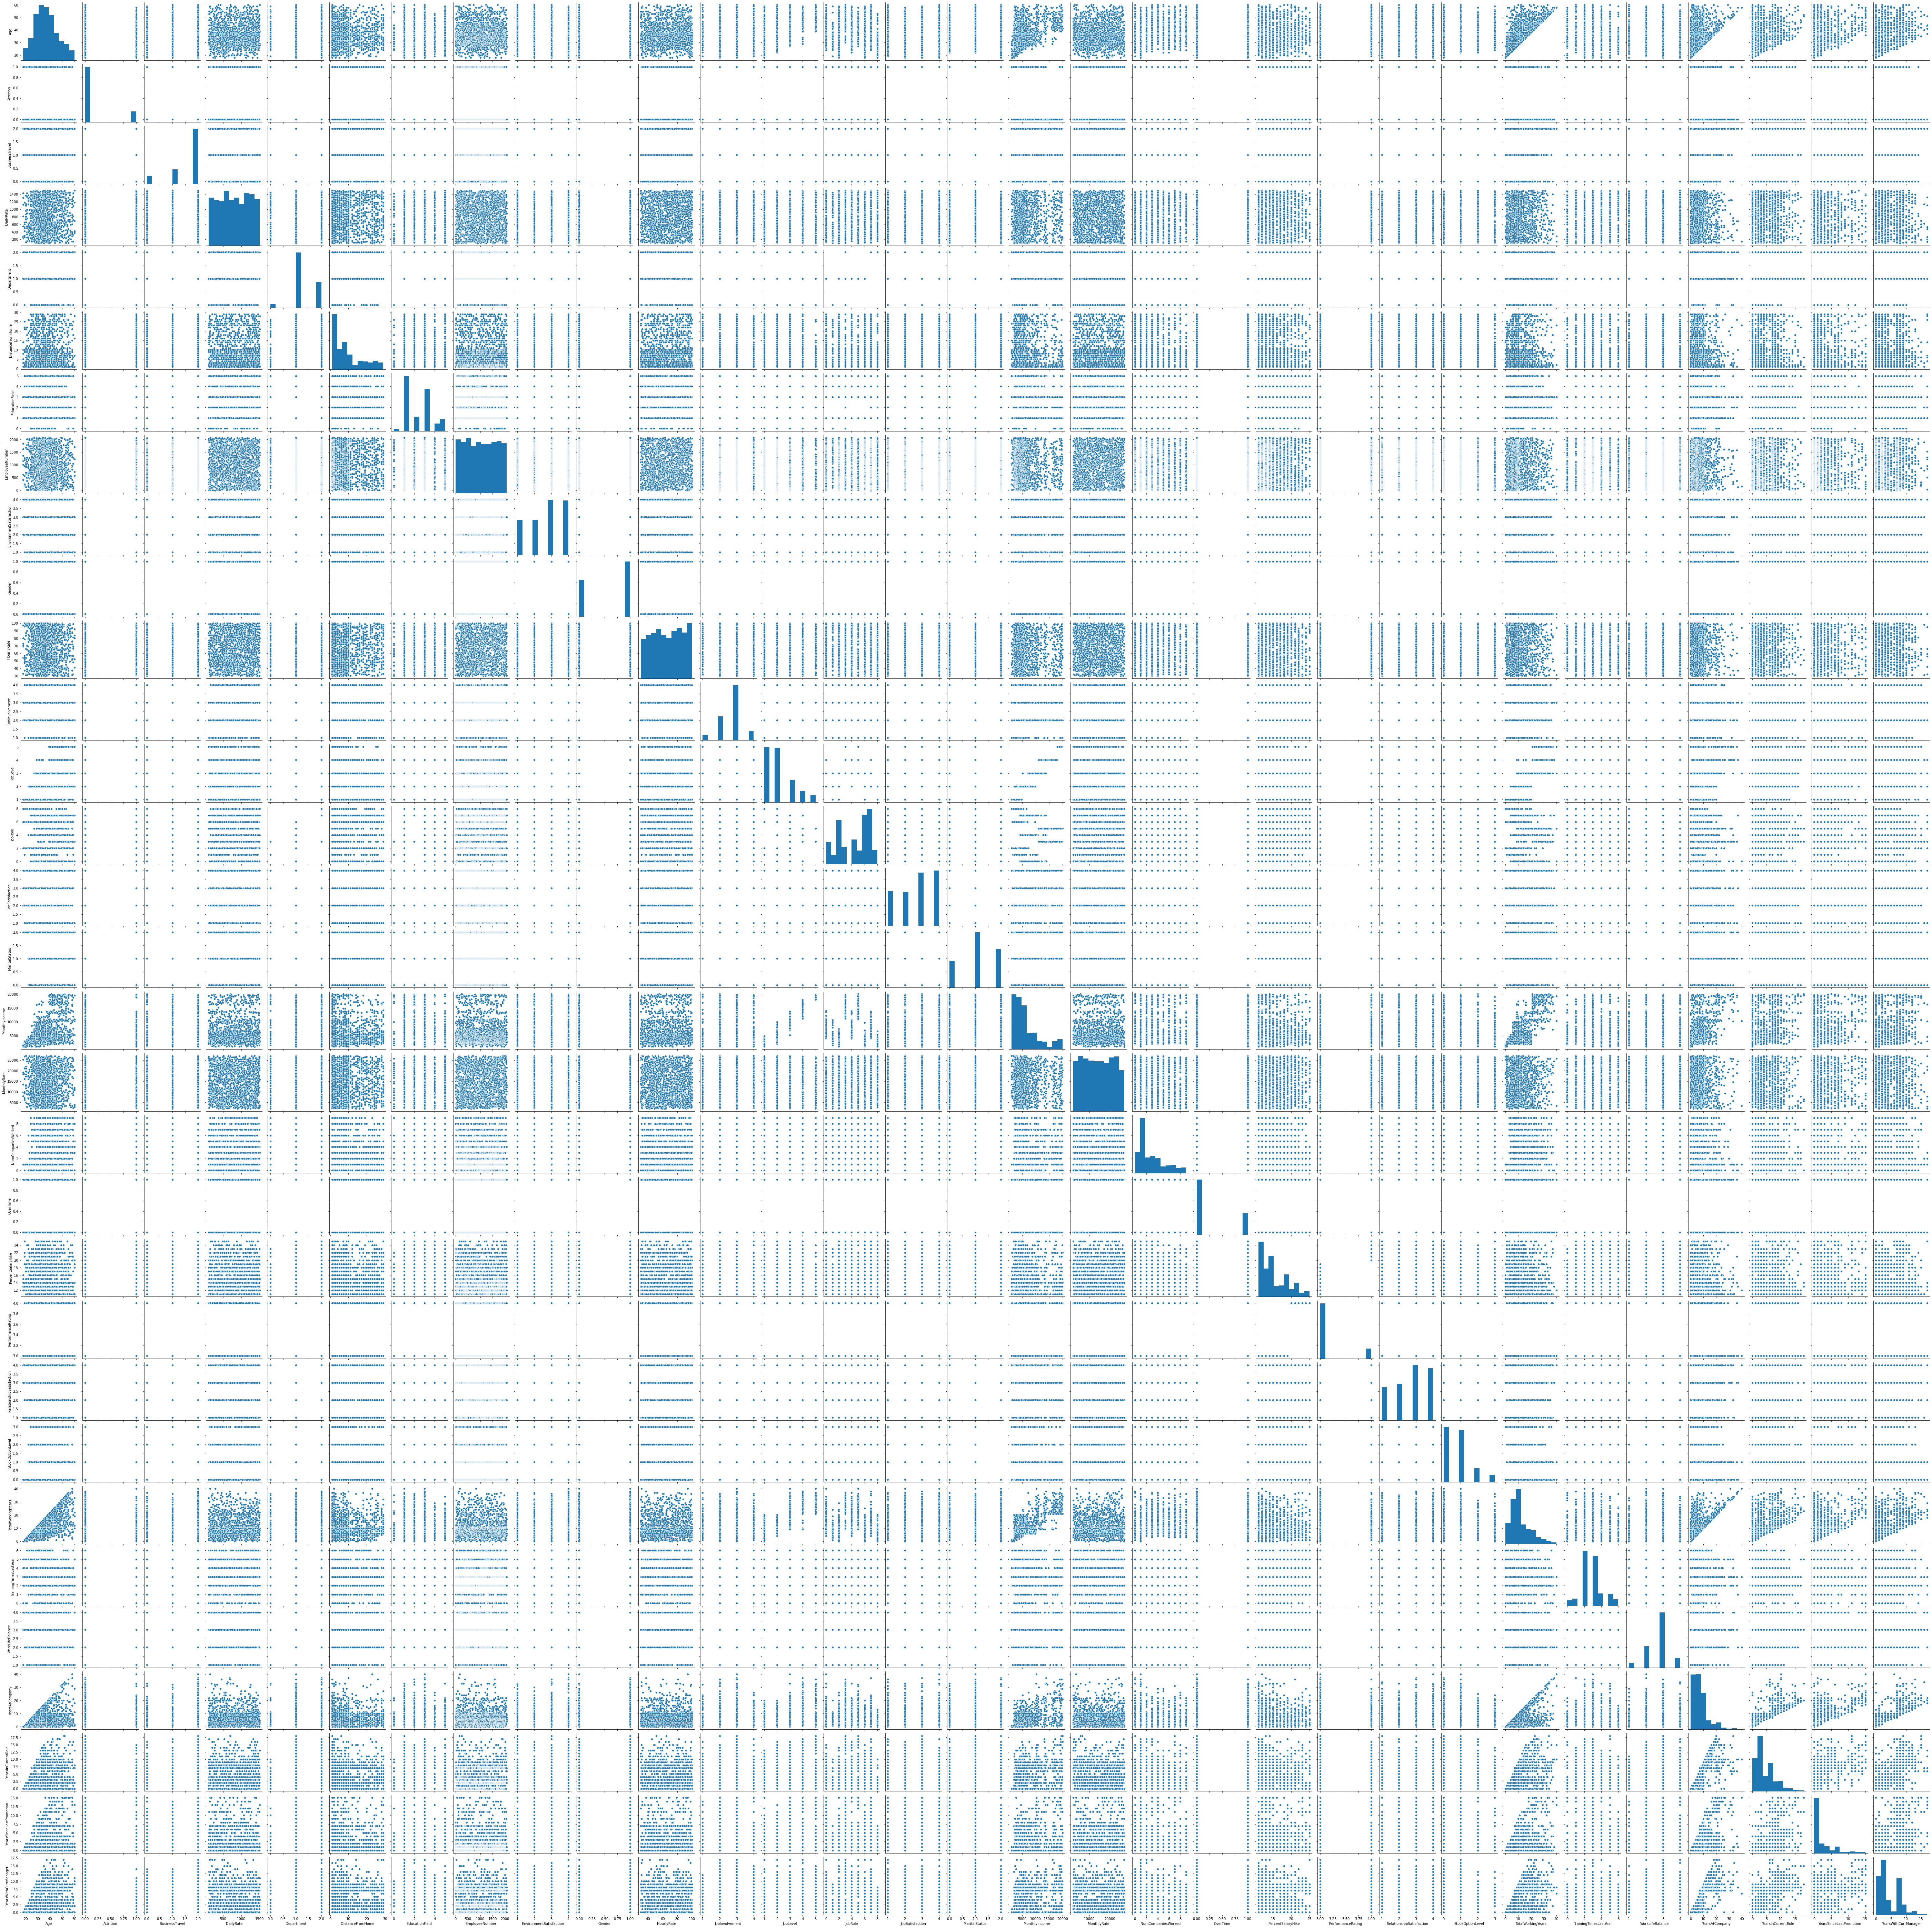

In [24]:
sns.pairplot(d1)

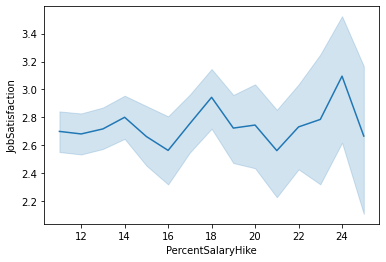

In [25]:
sns.lineplot(x="PercentSalaryHike",y="JobSatisfaction",data=d1)
plt.show()

#we can see that job satisfaction has a positive correlation with salary hike.

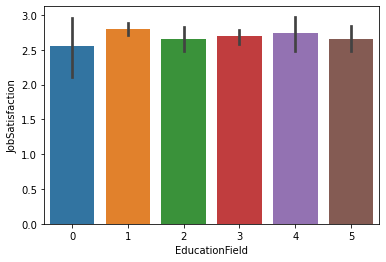

In [26]:
sns.barplot(x=d1['EducationField'],y=d1['JobSatisfaction'])

#Here we can see that almost all education field have job satisfaction
But little bit high for life science

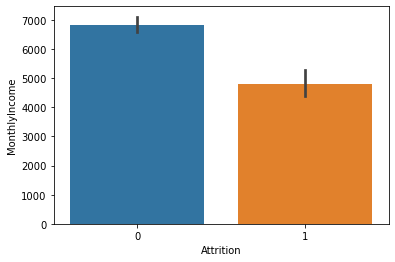

In [27]:
sns.barplot(x=d1['Attrition'],y=d1['MonthlyIncome'])

#Attrition is seen in employees with low monthly income 
#No attrition is seen in High income employees 

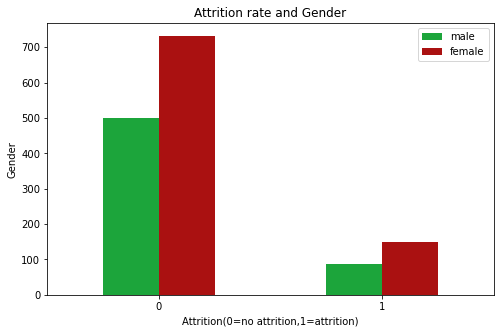

In [28]:
pd.crosstab(d1.Attrition,d1.Gender).plot(kind='bar',figsize=(8,5),color=['#1CA53B','#AA1111'])
plt.title('Attrition rate and Gender')
plt.xlabel('Attrition(0=no attrition,1=attrition)')
plt.xticks(rotation=0)
plt.legend(['male','female'])
plt.ylabel('Gender')
plt.show()

#No attrition rate and attrition rate is maximum in females than males

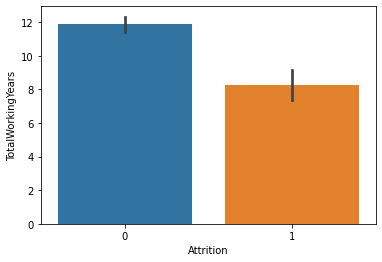

In [29]:
sns.barplot(x=d1['Attrition'],y=d1['TotalWorkingYears'])

#Attrition rate is more in less experienced employees
#No attrition is seen in employees with higher working experience

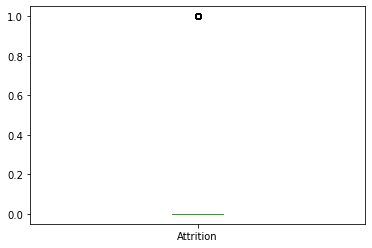

In [30]:
d1["Attrition"].plot.box()

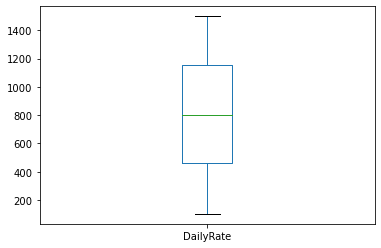

In [31]:
d1["DailyRate"].plot.box()

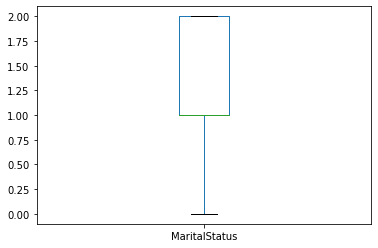

In [32]:
d1["MaritalStatus"].plot.box()

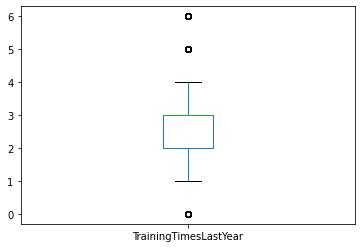

In [33]:
d1["TrainingTimesLastYear"].plot.box()

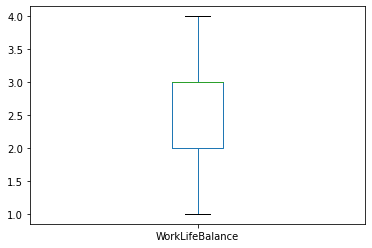

In [34]:
d1["WorkLifeBalance"].plot.box()

In [68]:
d1.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

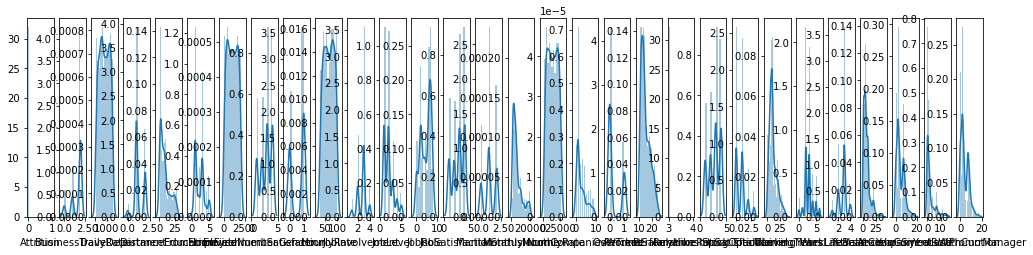

In [36]:
plt.figure(figsize=(20,30))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(d1[collist[i]])

#From the skewness graph we can see that some of the datas are skewed

In [37]:
for col in d1.columns:
    if d1.skew().loc[col]>0.55:
        d1[col]=np.log1p(d1[col])

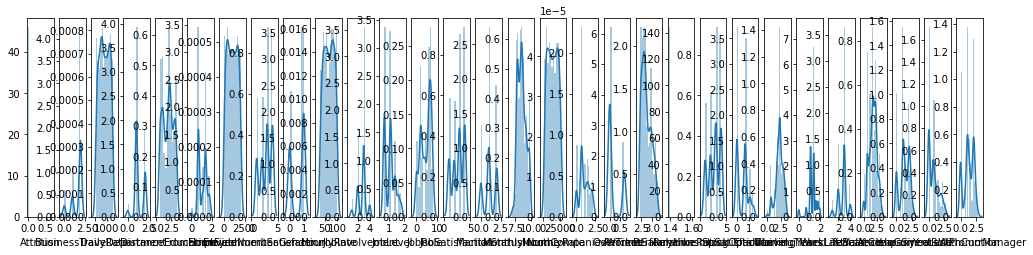

In [38]:
plt.figure(figsize=(20,30))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(d1[collist[i]])

#skewness graph after removal of skewness

In [69]:
#Implementing Zscore to remove the presence of outliers
from scipy.stats import zscore
columns=['Age','BusinessTravel','DailyRate','Department',
       'DistanceFromHome','EducationField','EmployeeNumber',
       'EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement',
       'JobLevel','JobRole','JobSatisfaction','MaritalStatus',
        'MonthlyIncome','MonthlyRate','NumCompaniesWorked','OverTime',
       'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction',
       'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear',
       'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole',
       'YearsSinceLastPromotion','YearsWithCurrManager']
for i in range(len(columns)):
    d1[columns[i]]=zscore(d1[columns[i]])
    for j in range(len(d1[columns[i]])):
        if d1[columns[i]][j]>3 or d1[columns[i]][j]<-3:
            d1[columns[i]].replace(d1[columns[i]][j],d1[columns[i]].median(),inplace=True)
            d1[columns[i]]=np.cbrt((d1[columns[i]]))

In [70]:
#Assigning x and y values to train the data
x=d1[columns]
y=d1[["Attrition"]]

In [71]:
#Checking the shape of assigned x and y
print(x.shape)
print(y.shape)

(1470, 30)
(1470, 1)


In [72]:
#Implementing standard scaler to scale the values to a common scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.4463504 ,  0.59004834,  0.74252653, ..., -0.27287664,
        -0.70856336,  0.8611216 ],
       [ 1.32236521, -0.91319439, -1.2977746 , ...,  1.1776579 ,
        -0.5053891 ,  1.1966653 ],
       [ 0.008343  ,  0.59004834,  1.41436324, ..., -0.99588342,
        -0.70856336, -0.98627949],
       ...,
       [-1.08667552,  0.59004834, -1.60518328, ..., -0.77229628,
        -0.70856336, -0.57933767],
       [ 1.32236521, -0.91319439,  0.54667746, ...,  1.03759415,
        -0.70856336,  1.30394606],
       [-0.32016256,  0.59004834, -0.43256792, ..., -0.60318167,
        -0.5053891 , -0.75666931]])

# PCA AND MODEL PREDICTION

In [54]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   float64
 2   BusinessTravel            1470 non-null   float64
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   float64
 5   DistanceFromHome          1470 non-null   float64
 6   EducationField            1470 non-null   float64
 7   EmployeeNumber            1470 non-null   float64
 8   EnvironmentSatisfaction   1470 non-null   float64
 9   Gender                    1470 non-null   float64
 10  HourlyRate                1470 non-null   float64
 11  JobInvolvement            1470 non-null   float64
 12  JobLevel                  1470 non-null   float64
 13  JobRole                   1470 non-null   float64
 14  JobSatis

In [44]:
#doing pca for dimensionality reduction 
from sklearn.decomposition import PCA
c=20
pca=PCA(n_components=c)
x=pca.fit_transform(x)
x.shape

(1470, 20)

#pca is done to remove multicollinearity.Multicollinearity means the feature columns of a dataset shows high correlation with each other.This may affect our model prediction accuracy and also the result.So PCA is done to resolve this problem

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_curve,roc_auc_score,auc

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dtc=  DecisionTreeClassifier()

max_score=0
for r_state in range(40,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
   
    dtc.fit(x_train,y_train)
    y_pred=dtc.predict(x_test)
    acc_scr=accuracy_score(y_test,y_pred)
    if acc_scr>max_score:
        max_score=acc_scr
        final_r_state=r_state
print("max accuracy score corresponding to",final_r_state,"is",max_score)

max accuracy score corresponding to 86 is 0.8271604938271605


In [75]:
x_train,x_test,y_train,Yytest=train_test_split(x,y,test_size=.22,random_state=86)

In [76]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1146, 30)
(324, 30)
(1146, 1)
(324, 1)


In [77]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print("Accuracy score :",accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy score : 0.8055555555555556
[[256  14]
 [ 49   5]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       270
           1       0.26      0.09      0.14        54

    accuracy                           0.81       324
   macro avg       0.55      0.52      0.51       324
weighted avg       0.74      0.81      0.76       324



In [79]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print("Accuracy score :",accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

Accuracy score : 0.6574074074074074
[[198  72]
 [ 39  15]]
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       270
           1       0.17      0.28      0.21        54

    accuracy                           0.66       324
   macro avg       0.50      0.51      0.50       324
weighted avg       0.72      0.66      0.69       324



In [80]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy score :",accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

Accuracy score : 0.7438271604938271
[[234  36]
 [ 47   7]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       270
           1       0.16      0.13      0.14        54

    accuracy                           0.74       324
   macro avg       0.50      0.50      0.50       324
weighted avg       0.72      0.74      0.73       324



In [81]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print("Accuracy score :",accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

Accuracy score : 0.8024691358024691
[[259  11]
 [ 53   1]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       270
           1       0.08      0.02      0.03        54

    accuracy                           0.80       324
   macro avg       0.46      0.49      0.46       324
weighted avg       0.71      0.80      0.75       324



In [82]:
#AUC-ROC CURVE
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [83]:
y_pred_prob=lr.predict_proba(x_test)[:,1]
y_pred_prob

array([7.46739331e-02, 6.85457139e-03, 5.53224715e-01, 1.33474438e-01,
       2.46165810e-01, 1.91338027e-02, 7.28417735e-02, 2.97379234e-02,
       1.36777875e-01, 2.12626013e-01, 1.01483201e-01, 2.67084190e-01,
       1.96768734e-01, 1.17786802e-01, 3.40199695e-02, 8.46108095e-03,
       4.16927941e-01, 2.95052844e-02, 3.24711171e-02, 1.73812457e-01,
       2.85076492e-01, 7.51636548e-02, 5.04998159e-02, 1.52724721e-01,
       2.55466328e-01, 6.87143305e-01, 6.21979656e-02, 7.25339283e-02,
       2.33535600e-01, 2.24202494e-02, 1.25406499e-02, 1.94642063e-02,
       3.42113416e-01, 1.12062775e-01, 1.38525429e-01, 2.28273263e-02,
       5.11675703e-02, 3.00291132e-01, 5.86898138e-01, 2.57014707e-02,
       2.39781126e-02, 1.81484893e-01, 5.63631275e-02, 3.67165053e-03,
       1.79607516e-02, 1.88122138e-02, 2.39282196e-02, 2.41256728e-02,
       5.08669783e-03, 8.39734993e-02, 3.28879012e-02, 5.99945166e-02,
       1.10185787e-01, 2.51279152e-01, 1.74272413e-01, 8.76381029e-02,
      

In [84]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr

array([0.        , 0.0037037 , 0.01851852, 0.01851852, 0.02962963,
       0.02962963, 0.03333333, 0.03333333, 0.07407407, 0.07407407,
       0.12592593, 0.12592593, 0.16296296, 0.16296296, 0.19259259,
       0.19259259, 0.21111111, 0.21111111, 0.21481481, 0.21481481,
       0.27037037, 0.27037037, 0.27407407, 0.27407407, 0.32962963,
       0.32962963, 0.38888889, 0.38888889, 0.3962963 , 0.3962963 ,
       0.43333333, 0.43333333, 0.44814815, 0.44814815, 0.45555556,
       0.45555556, 0.47037037, 0.47037037, 0.49259259, 0.49259259,
       0.50740741, 0.50740741, 0.52962963, 0.52962963, 0.53333333,
       0.53333333, 0.53703704, 0.53703704, 0.58148148, 0.58148148,
       0.6037037 , 0.6037037 , 0.61481481, 0.61481481, 0.61851852,
       0.61851852, 0.64814815, 0.64814815, 0.68148148, 0.68148148,
       0.7037037 , 0.7037037 , 0.71481481, 0.71481481, 0.76666667,
       0.76666667, 0.77037037, 0.77037037, 0.79259259, 0.79259259,
       0.81481481, 0.81481481, 0.81851852, 0.81851852, 0.83703

In [85]:
tpr

array([0.        , 0.        , 0.        , 0.01851852, 0.01851852,
       0.03703704, 0.03703704, 0.09259259, 0.09259259, 0.11111111,
       0.11111111, 0.12962963, 0.12962963, 0.18518519, 0.18518519,
       0.2037037 , 0.2037037 , 0.22222222, 0.22222222, 0.24074074,
       0.24074074, 0.25925926, 0.25925926, 0.27777778, 0.27777778,
       0.2962963 , 0.2962963 , 0.31481481, 0.31481481, 0.33333333,
       0.33333333, 0.35185185, 0.35185185, 0.37037037, 0.37037037,
       0.38888889, 0.38888889, 0.40740741, 0.40740741, 0.42592593,
       0.42592593, 0.44444444, 0.44444444, 0.48148148, 0.48148148,
       0.5       , 0.5       , 0.51851852, 0.51851852, 0.53703704,
       0.53703704, 0.57407407, 0.57407407, 0.61111111, 0.61111111,
       0.64814815, 0.64814815, 0.66666667, 0.66666667, 0.68518519,
       0.68518519, 0.7037037 , 0.7037037 , 0.72222222, 0.72222222,
       0.75925926, 0.75925926, 0.77777778, 0.77777778, 0.7962963 ,
       0.7962963 , 0.81481481, 0.81481481, 0.83333333, 0.83333

In [86]:
thresholds

array([1.93504134e+00, 9.35041342e-01, 6.87143305e-01, 6.73436853e-01,
       6.11344697e-01, 5.99859829e-01, 5.86898138e-01, 5.54149534e-01,
       4.53657317e-01, 4.52569232e-01, 3.49464578e-01, 3.43554968e-01,
       2.95977439e-01, 2.85076492e-01, 2.65380565e-01, 2.57949529e-01,
       2.41026601e-01, 2.33535600e-01, 2.32445336e-01, 2.29023663e-01,
       2.09537861e-01, 2.08454867e-01, 2.06044726e-01, 2.02687523e-01,
       1.67879570e-01, 1.67431603e-01, 1.42380464e-01, 1.42281371e-01,
       1.40463819e-01, 1.38525429e-01, 1.26428695e-01, 1.17786802e-01,
       1.13952833e-01, 1.12941443e-01, 1.11044958e-01, 1.10185787e-01,
       1.07579987e-01, 1.05513740e-01, 1.01483201e-01, 9.80734122e-02,
       9.55150518e-02, 9.30078343e-02, 8.76677852e-02, 8.57861565e-02,
       8.39734993e-02, 8.35052048e-02, 8.22359114e-02, 8.18811604e-02,
       7.25339283e-02, 7.22055685e-02, 6.64154690e-02, 6.43223158e-02,
       6.05848488e-02, 5.99945166e-02, 5.91418992e-02, 5.88052424e-02,
      

In [88]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

0.5203703703703704


In [91]:
#using ensemble technique to boost our score
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=20,random_state=86)
rf.fit(x_train,y_train)
print('score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print("Accuracy score :",accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

score: 0.9973821989528796


Accuracy score : 0.8179012345679012
[[262   8]
 [ 51   3]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       270
           1       0.27      0.06      0.09        54

    accuracy                           0.82       324
   macro avg       0.55      0.51      0.50       324
weighted avg       0.74      0.82      0.76       324



#Random forest classifier is giving the best accuracy score.so checking its cross_val_score

In [92]:
rf=RandomForestClassifier()
score=cross_val_score(rf,x,y,cv=5)
print("score:",score)
print("Mean score:",score.mean())
print("Standard deviation:",score.std())

score: [0.85034014 0.86734694 0.86394558 0.86054422 0.85714286]
Mean score: 0.8598639455782312
Standard deviation: 0.0058519219503691405


#saving random forest classifier as best model

In [93]:
import joblib
joblib.dump(rf,'rf_hr-analytics.pkl')

['rf_hr-analytics.pkl']